<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/9th_lec_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2つの量的変数の関係の可視化

## 生活保護と学力

2015年子供の生活保護受給率（％）と2018年子供の学力（算数Aおよび理科）の関係を見てみましょう．


In [ ]:
!pip install xlrd==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data =[['Sapporo'	,	39.0	,	8.9	,	9.4	]	,
[	'Sendai' ,	14.0	,	9.0	,	9.7	]	,
[	'Saitama'	,	11.1	,	9.1	,	10.1	]	,
[	'Chiba'	,	13.6	,	8.9	,	9.9	]	,
[	'Yokohama'	,	15.4	,	9.3	,	9.7	]	,
[	'Kawasaki'	,	17.7	,	9.2	,	9.7	]	,
[	'Sagamihara'	,	20.4	,	8.5	,	9.3	]	,
[	'Niigata'	,	10.8	,	9.3	,	9.9	]	,
[	'Shizuoka'	,	8.6	,	9.0	,	9.7	]	,
[	'Hamamatsu'	,	6.9	,	8.6	,	9.7	]	,
[	'Nagoya'	,	14.5	,	8.5	,	9.6	]	,
[	'Kyoto'	,	31.8	,	9.2	,	10.2	]	,
[	'Osaka'	,	40.1	,	8.6	,	8.8	]	,
[	'Sakai'	,	25.8	,	9.1	,	9.4	]	,
[	'Kobe'	,	28.1	,	8.9	,	9.3	]	,
[	'Okayama'	,	16.2	,	8.7	,	9.7	]	,
[	'Hiroshima'	,	20.7	,	9.0	,	9.9	]	,
[	'Kitakyushu'	,	15.4	,	8.6	,	9.6	]	,
[	'Fukuoka'	,	21.3	,	9.0	,	10.0	]	,
[	'Kumamoto'	,	15.5	,	8.8	,	9.9	]]

df_gakuryoku = pd.DataFrame(data, columns=['City', 'Welfare_Rate', 'Math', 'Science'])
df_gakuryoku


,City,Welfare_Rate,Math,Science
0,Sapporo,39.0,8.9,9.4
1,Sendai,14.0,9.0,9.7
2,Saitama,11.1,9.1,10.1
3,Chiba,13.6,8.9,9.9
4,Yokohama,15.4,9.3,9.7
5,Kawasaki,17.7,9.2,9.7
6,Sagamihara,20.4,8.5,9.3
7,Niigata,10.8,9.3,9.9
8,Shizuoka,8.6,9.0,9.7
9,Hamamatsu,6.9,8.6,9.7


散布図（scatter plot）を描きます．一般的に，要因を横軸，それに伴う結果を縦軸に取ることが多いです．

ここでは，貧しさ（原因）が学力（その結果）に及ぼす影響を検討したいので，横軸は学力ではなく生活保護率にしなければならない


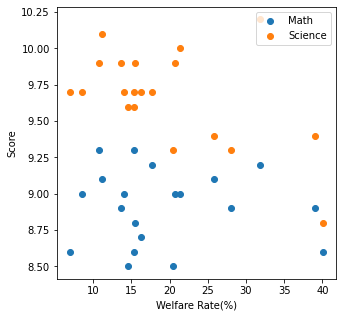

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_gakuryoku['Welfare_Rate'],df_gakuryoku['Math'])
plt.scatter(df_gakuryoku['Welfare_Rate'],df_gakuryoku['Science'])
plt.xlabel('Welfare Rate(%)')
plt.ylabel('Score')
plt.legend(['Math', 'Science'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


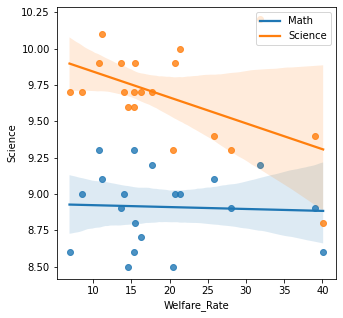

In [ ]:
#回帰直線を描くこともできる
import seaborn as sns

plt.figure(figsize=(5,5))
sns.regplot('Welfare_Rate','Math',data=df_gakuryoku)
sns.regplot('Welfare_Rate','Science',data=df_gakuryoku)
plt.legend(['Math', 'Science'], loc='upper right')

In [ ]:
#相関係数
df_gakuryoku.corr()

,Welfare_Rate,Math,Science
Welfare_Rate,1.000000,-0.047576,-0.514307
Math,-0.047576,1.000000,0.497704
Science,-0.514307,0.497704,1.000000


##Irisデータセットで相関を見る

sepal length (がくの長さ)、sepal width (がくの幅)、petal length (花弁の長さ)、petal width (花弁の幅) の関係を見てみましょう


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

#Irisデータを読み込みます
iris = datasets.load_iris()

#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

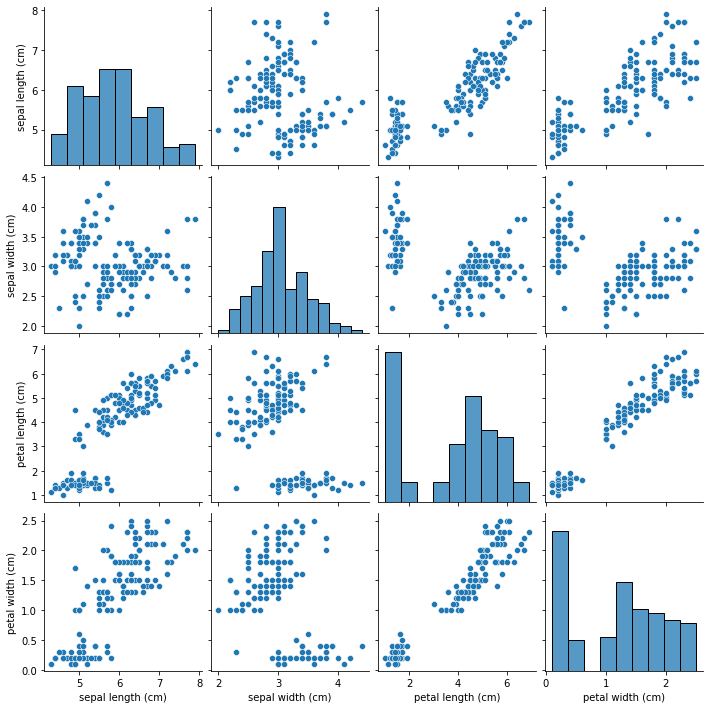

In [ ]:
#ペアプロット（種の区別なし）
sns.pairplot(df)

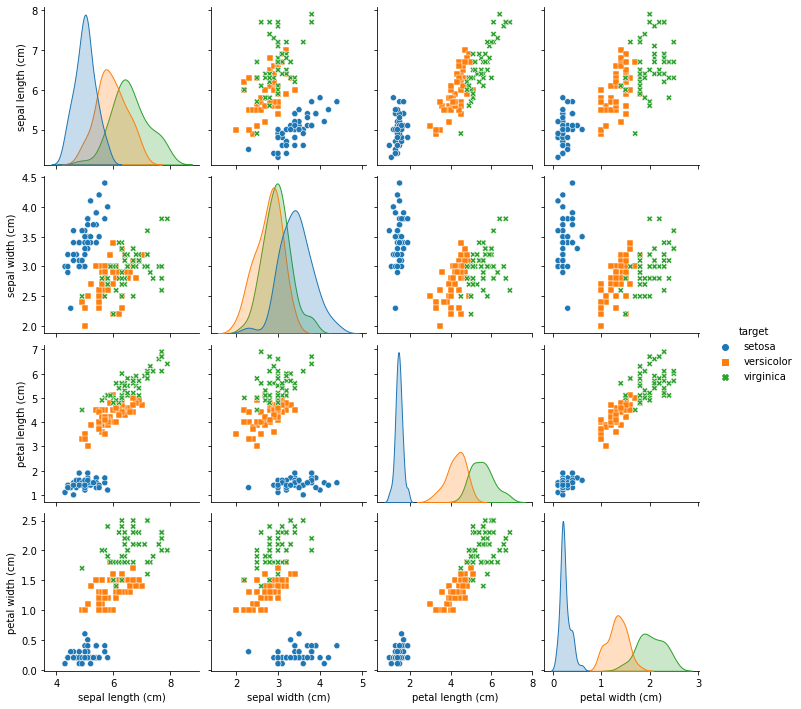

In [ ]:
#ペアプロット（種の区別あり）
sns.pairplot(df, hue='target', markers=["o", "s", "X"])

In [ ]:
#相関係数の算出
df.drop('target', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


##GDPと特殊出生率

小森のGoogle Drive上のデータを読み込むためにurllibライブラリを使います．

ネタ元はこちらです
https://honkawa2.sakura.ne.jp/1563.html

In [ ]:
import pandas as pd
import urllib
import io

url = "https://drive.google.com/uc?id=1W98VH-en4XoYI1zx7i8ruYh3Y2kWA_Ee"
res = urllib.request.urlopen(url)
res=res.read().decode('shift-jis')
df =pd.read_csv(io.StringIO(res))

#Indexをname列にする
df.set_index(['国名'],inplace=True)
df.head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
カタール,1,134290,2.04,False
マカオ,2,127743,1.06,False
ルクセンブルク,3,89577,1.57,True
クウェート,4,83840,2.63,False
シンガポール,5,75952,1.29,False


まずは１人当たりGDP（米ドル・ＰＰＰベースと合計特殊出生率を散布図にプロットしてみましょう．

基本的に散布図ではX軸は「原因」Y軸は「結果」と対応するように書くのが普通です．

GDPが出生率に影響していると考えるなら，GDPを横軸，出生率を縦軸にします


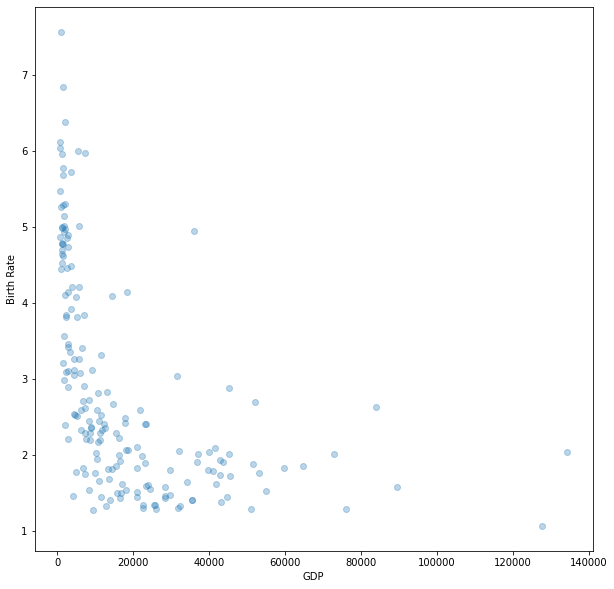

In [ ]:
#散布図を書きます

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次にX軸だけ対数軸にしてみてみましょう．こうするとかなりきれいな直線的な関係が見えてきます．

つまり，GDPがわかれば出生率をかなり正確に予測できるということです．

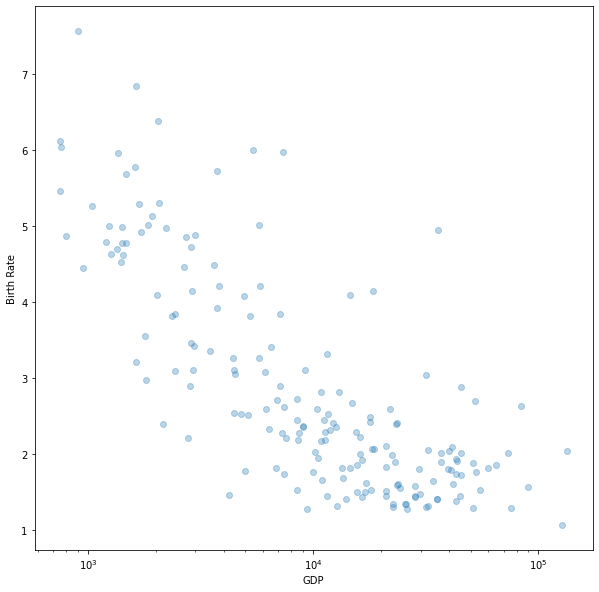

In [ ]:
#上の図のX軸を対数軸にして表示してみます
plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次に先進国（OECD加盟国）のみを抜き出して分析してみましょう

In [ ]:
df_dict = {}
for name, group in df.groupby('OECD高所得国'):
    df_dict[name] = group

df_dict[1].head() #df_dict[1]は先進国のデータだけのDataFrameです．

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ルクセンブルク,3,89577,1.57,True
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True


先進国だけを見るとGDPと出生率の関係は明確でないことがわかります

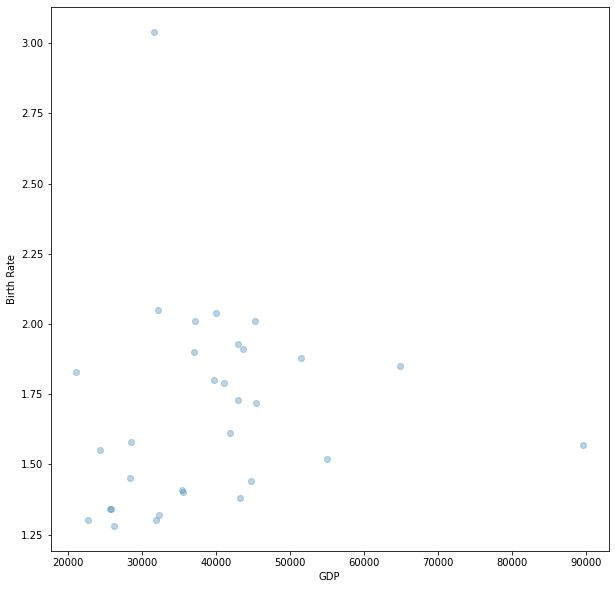

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

さらにここからイスラエルとルクセンブルクを抜きます

In [ ]:
# inplace=Trueとすると，dropメソッドで列/行を削除したデータフレームに置き換えられます
df_dict[1].drop(['ルクセンブルク','イスラエル'], inplace=True)
df_dict[1].head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True
アイルランド,16,45282,2.01,True


外れ値を省くと，先進国ではGDPと出生率には明確な関係が認められないことがわかります．

もちろん，この「外れ値を省く」操作には十分な妥当性が必要です．

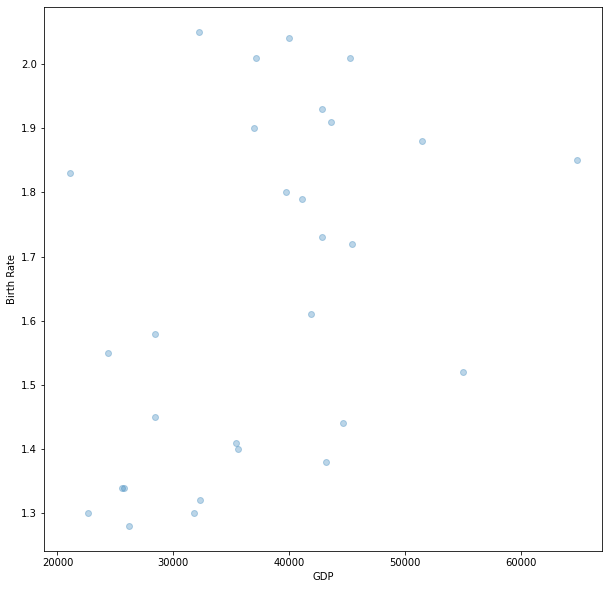

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

###政府統計の活用（Webデータ）


政府統計
社会・人口統計体系 / 統計でみる都道府県のすがた2019 / 社会生活統計指標

https://www.e-stat.go.jp/stat-search/files?page=1&stat_infid=000032055318

からExcelファイルをダウンロードします
https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032055318&fileKind=0


ただ，一部いわゆる「神エクセル」なので，データの整理には大変苦労します．

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import urllib

#url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032055318&fileKind=0"
url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032169052&fileKind=0"


#xlsを読み込む関数
def read_xls(url):
    print(url)
    df = pd.read_excel(url)
    return df

#実行
df = read_xls(url)
df.head(10)

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032169052&fileKind=0


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,71,72,73,74,75,76,77,78,79,80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71,72,73,74,75,76,77,78,79,80
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No.36,NaN,No.37,NaN,No.38,NaN,No.39,NaN,No.40,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,高齢夫婦のみ\nの世帯割合\n（対一般世帯数）,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ratio of aged-couple households,NaN,Ratio of aged-single-person households,NaN,Ratio of dual-income households,NaN,"Rate of marriages (per 1,000 persons)",NaN,"Rate of divorces (per 1,000 persons)",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,#A06302,NaN,#A06304,NaN,#F01503,NaN,#A06601,NaN,#A06602,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,単位,Unit,...,％,NaN,％,NaN,％,NaN,－,NaN,－,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,年度,Fiscal year,...,2015,NaN,2015,NaN,2015,NaN,2019,NaN,2019,NaN


In [ ]:
#泥臭く列名のリネームや不要な行列の削除を行う
df = df.drop(df.columns[0:9], axis=1)
df = df.rename(columns=df.loc[5,:])
df = df.drop(df.index[range(0,12)])
df.head()

,NaN,NaN,総人口,NaN,総人口(男),NaN,総人口(女),NaN,外国人人口\n（人口10万人当たり）,NaN,...,高齢夫婦のみ\nの世帯割合\n（対一般世帯数）,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN
12,Hokkaido,NaN,525,8,247,8,278,8,402.8,42,...,13.43,9,13.1,9,21.14,45,4.46,14,1.87,4
13,Aomori-ken,NaN,125,31,59,32,66,31,263.5,47,...,11.07,37,12.09,15,27.58,23,3.69,45,1.61,25
14,Iwate-ken,NaN,123,32,59,31,64,32,392.1,43,...,10.93,38,10.91,26,29.84,14,3.66,46,1.43,40
15,Miyagi-ken,NaN,231,14,113,14,118,14,599.4,30,...,9.55,45,9.06,45,24.61,35,4.37,19,1.64,16
16,Akita-ken,NaN,97,38,45,39,51,38,284.8,46,...,12.68,19,12.34,13,30.18,12,3.27,47,1.32,45


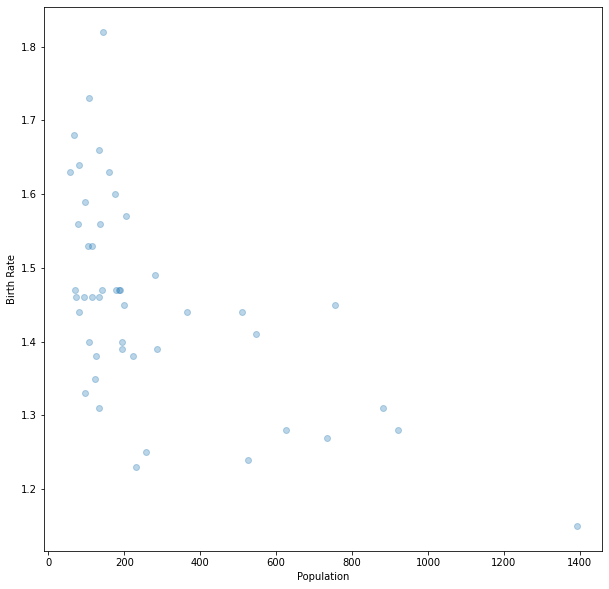

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['総人口'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('Population')
plt.ylabel('Birth Rate')
plt.show()